# Inference from Scientific Data, 2020 - Worksheet 3 - Question 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from scipy.stats import t
from scipy import stats

In [2]:
path = r"C:\Users\shari\OneDrive\Documents\Work\4th Yr\Inference for Scientific Data\Problem Sheet 3\Tdisp.xls"

In [3]:
xl = pd.ExcelFile(path)
df = xl.parse("Tdisp")  # sheet name
x = df.to_numpy().T
T = x[0]
D = x[1]

In [4]:
df

,Temp degc,Displacement (10^-6m)
0,23.4,3.11
1,24.9,2.96
2,17.7,2.85
3,12.3,2.78
4,16.2,2.92
5,11.1,2.76
6,16.5,2.77
7,27.3,3.00
8,21.9,2.89
9,28.2,3.09


<AxesSubplot:xlabel='Displacement (10^-6m)', ylabel='Temp degc'>

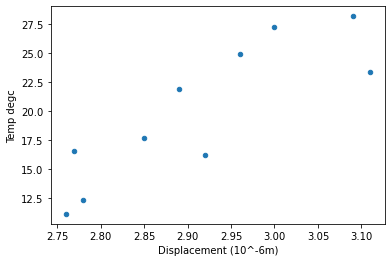

In [5]:
df.plot(x = "Displacement (10^-6m)", y = "Temp degc", kind = "scatter")

There does appear to be an upward trend. Additionally, there doesnt appear to be any rogue points 

### Part 1

$H_0$, the null hypothesis, is that T and D are uncorrelated.

#### Part a - The Pearson Test

The Pearson correlattion coefficient, $r_p$ is given by:

\begin{equation*}
r_p = \frac{1}{\sigma_T \sigma_D}\frac{1}{N}\sum^N_{i=1}\big(T_i-\hat{T}\big)\big(D_i-\hat{D}\big)
\end{equation*}

Where $\sigma_T$ is the standard deviation of the temperature, and $\hat{T}$ the the mean of the temperature. The equivalent with $D$. 

The standard deviation of the Pearson correlattion coefficient, $\sigma_{r_p}$ is given by:

\begin{equation*}
\sigma_{r_p} = \frac{1-r_p^2}{N-1}
\end{equation*}

In [6]:
sig_T = df.std(ddof = 0).values[0]
sig_D = df.std(ddof = 0).values[1]

av_T = df.mean().values[0]
av_D = df.mean().values[1]

N = len(T)

In [7]:
rp = 1/(sig_T*sig_D*N)*sum((T-av_T)*(D-av_D))
rp

0.8565991395278174

In [8]:
sig_rp = (1-rp**2)/(N-1)
sig_rp

0.02958199046224476

 ### the Pearson correlation coefficient, $r_p = 0.857 \pm 0.029$

A value of $r_p$ close to +1 indicates a positive correlation

$t_p$ is given by:

\begin{equation*}
t_p = \frac{r_p\sqrt{N-2}}{\sqrt{1-r_p^2}}
\end{equation*}

In [9]:
tp = rp*np.sqrt(N-2)/(np.sqrt(1-rp**2))
tp

4.695563047666037

### Pearson statistic $t_p = 4.700$

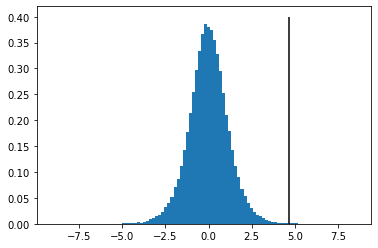

In [10]:
dof = len(T)-2
s = np.random.standard_t(dof, size=100000)
h = plt.hist(s, bins=100, density=True); plt.vlines(tp, ymin = 0, ymax = 0.4, color = "k")

Without assuming any any correlation, we can perform a two tailed test for positive and negative correlations

\begin{equation*}
p = \int_{|t_p|}^{\infty}f_{\nu=8}(t_p')dtp'
\end{equation*}

This can be evaluated numerically using the trapezium rule

In [11]:
p = (np.sum(tp<s)/float(len(s)) + np.sum(-tp>s)/float(len(s)))
p

0.00156

### p-value $\sim 0.14\%$

Note that the value of p might be diffrent due to the random generation of the normal distribution

Repeating this with the stats package:

In [12]:
vals = stats.pearsonr(T, D)
vals

(0.8565991395278174, 0.001550329624127627)

In [13]:
tp = vals[0]*np.sqrt(N-2)/(np.sqrt(1-vals[0]**2))
tp

4.695563047666037

Therefore, there is a 0.14% chance of obtaining a $|t_p| \geq 4.70$  under the null hypotheses as per my calculation.

Or, a 0.16% chance of obtaining a $|t_p|\geq 4.70$  under the null hypotheses using the stats package. 

Consequently, it is likely that the null hypothesis is incorrect and there is infact a correlation between $T$ and $D$. The value of $r_p \sim 1$ indicates that this correlation is likely to be positive.

#### Part b - The Spearman rank Test

The Spearman correlattion coefficient, $r_s$ is given by:

\begin{equation*}
r_s = 1 - \frac{6\sum_{i=1}^N d_i^2}{N(N^2-1)}
\end{equation*}

Where $d_i$ is the difference between the ranked values of each row in the data

The corresponding $t_s$ and p values are found in a similar way as in the Pearson test. 

This is all conveniently done in a stats package used below

In [14]:
vals2 = stats.spearmanr(T, D)
vals2

SpearmanrResult(correlation=0.8303030303030302, pvalue=0.0029402270232795065)

A value of $r_s$ close to +1 indicates a positive correlation

In [15]:
ts = vals2[0]*np.sqrt(N-2)/(np.sqrt(1-vals2[0]**2))
ts

4.213888825657924

### $r_s = 0.830$, $t_s = 4.21$,  $p = 0.294\%$

Therefore, there is a 0.29% chance of obtaining a $|t_s|\geq 4.21$  under the null hypotheses using a two tailed test. 

Consequently, it is likely that the null hypothesis is incorrect and there is infact a correlation between $T$ and $D$. The value of $r_s \sim 1$ indiates that this correlation is likely to be positive.

### Part 2

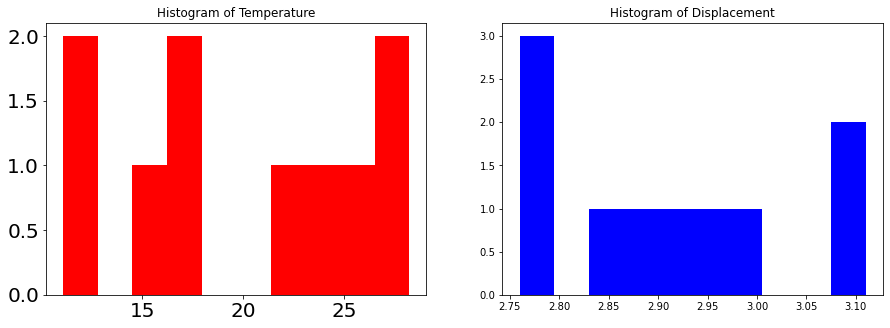

In [16]:
fig, axs = plt.subplots(1, 2)
axs[0].set_title('Histogram of Temperature')
axs[0].hist(T, bins = 10, color = "red")
axs[1].set_title('Histogram of Displacement')
axs[1].hist(D, bins = 10, color = "blue")
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[0].tick_params(axis='both', which='major', labelsize=20)

fig.set_figheight(5)
fig.set_figwidth(15)

The Pearson test assumes the probability distribution of $T$ and $D$ are both gaussian. Clearly, this is not the case. It could be expected that the Spearman rank test performs better than the Pearson correlation test as the former is a "distriution free" test and therefore doesn't assume any shapes of the distributions of $T$ and $D$.

It just so happens that the two processes produce similar results. This may be due to the fairly unambiguous presence of a positive correlation. 

### Part 3

Linear regression on the data.

This is done by minimising 

\begin{equation*}
R^2 = \sum^N_{i=1}\big(d_i - M_i(a,b,c,...)\big)^2
\end{equation*}

Where $M_i$ is the straight line equation $M_i = ax_i+b$

\begin{equation*}
\Rightarrow R^2 = \sum^N_{i=1}\big(d_i - ax_i+b\big)^2
\end{equation*}

Where $d_i$ and $x_i$ are $T$ and $D$ depending on how the x and y axis are labelled.

Minimising $R^2$ with respect to $a$ and $b$ gives simultaneous equations

\begin{equation*}
\frac{\partial}{\partial a} R^2 \bigg|_{a=\hat{a}, b = \hat{b}} = 0
\end{equation*}

\begin{equation*}
\frac{\partial}{\partial b} R^2 \bigg|_{a=\hat{a}, b = \hat{b}} = 0
\end{equation*}

which are solved by 

\begin{equation*}
\hat{a} = \frac{\bar{x}\bar{d}-\bar{xd}}{\bar{x^2}-\bar{x}^2}
\end{equation*}

\begin{equation*}
\hat{b} = \bar{d}-\hat{a}\bar{x}
\end{equation*}

This is all conveniently done in the stats package

In [17]:
a, b, r_value, p_value, std_err = stats.linregress(T,D)

In [18]:
a2, b2, r_value2, p_value2, std_err2 = stats.linregress(D,T)

In [19]:
Tdom = np.linspace(df["Temp degc"].min(), df["Temp degc"].max(), 10)
Ddom = np.linspace(df["Displacement (10^-6m)"].min(), df["Displacement (10^-6m)"].max(), 10)

def M(x, a, b):
    y = a*x+b
    return y

y1 = M(Tdom, a, b)
y2 = M(Ddom, a2, b2)

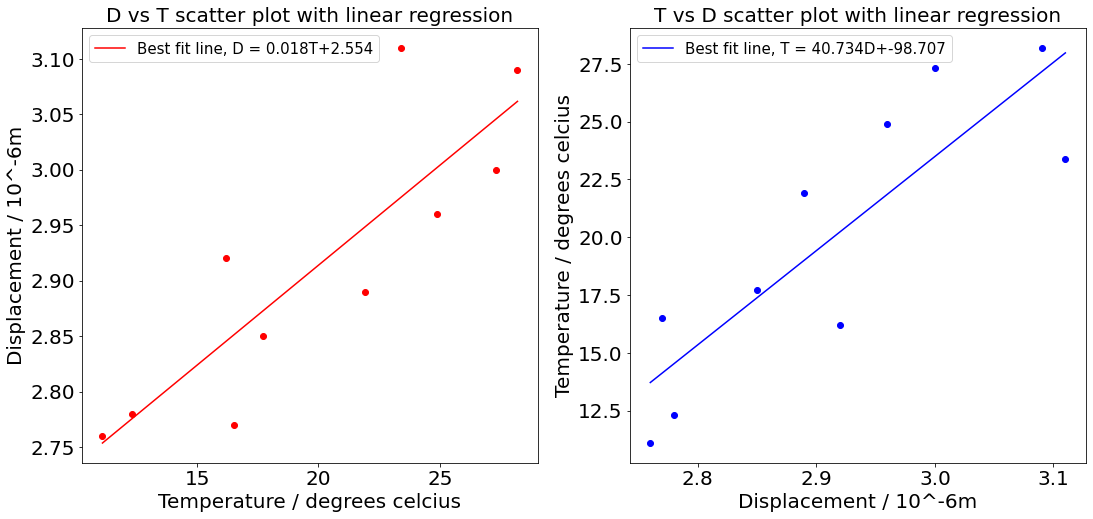

In [20]:
fig, axs = plt.subplots(1, 2)
axs[0].set_title('D vs T scatter plot with linear regression', fontsize = 20)
axs[0].scatter(T, D, color = "red")
axs[0].plot(Tdom, y1, color = "red")
axs[0].set_ylabel('Displacement / 10^-6m', fontsize = 20)
axs[0].set_xlabel('Temperature / degrees celcius', fontsize = 20)
axs[0].legend(["Best fit line, D = {}T+{}".format(np.round(a,3), np.round(b, 3))], fontsize = 15)
axs[0].tick_params(axis='both', which='major', labelsize=20)

axs[1].set_title('T vs D scatter plot with linear regression', fontsize = 20)
axs[1].scatter(D, T, color = "blue")
axs[1].plot(Ddom, y2, color = "blue")
axs[1].set_xlabel('Displacement / 10^-6m', fontsize = 20)
axs[1].set_ylabel('Temperature / degrees celcius', fontsize = 20)
axs[1].legend(["Best fit line, T = {}D+{}".format(np.round(a2, 3), np.round(b2, 3))], fontsize = 15)
axs[1].tick_params(axis='both', which='major', labelsize=20)

fig.set_figheight(8)
fig.set_figwidth(18)

In [21]:
print(r_value/r_value2)

1.0


The fact that $\frac{R1}{R2} = 1$ suggests that the accuracy of the regression fit doesnt change when swapping the domain and range of the plots.